# Pleiades & Praesepe spectrum comparison

We want to reproduce the relative spectra shown by Stauffer et al. (2003) showing that K-dwarfs in the Pleiades emit more flux at blue wavelengths with only a mild flux enhancement at redder wavelengths. Several steps must be taken to carry out this comparison. 

First, we must identify relavent stellar properties to use for computation of stellar spectra. This requires a model comparison between an isochrone representative of the Pleiades and one of Praesepe. After that, we need to correct for the fact that the two clusters lie at different distances so that we're comparing stars of the appropriate magnitude/color. Only then may we extract the appropriate stellar properties.

Some preliminaries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Now we'll import isochrones for each cluster adopting nominal ages (Pleiades: 120 Myr; Praesepe: 600 Myr). For low-mass stars, the particular age adopted is unimportant after about 100 Myr. We'll also import the empirical CMD from Kamai et al. (2014).

In [2]:
iso_120_gas07 = np.genfromtxt('data/dmestar_00120.0myr_z+0.00_a+0.00_marcs.iso')
iso_600_gas07 = np.genfromtxt('data/isochrone_600.0myr_z+0.15_a+0.00_marcs.iso')
iso_emp_k14 = np.genfromtxt('data/Kamai_Pleiades_emp.iso')

Load data for Pleiades and Praesepe stars to demonstrate that models fit data.

In [3]:
pleiades_s07 = np.genfromtxt('data/Stauffer_Pleiades_litPhot.txt', usecols=(2, 3, 5, 6, 8, 9, 13, 14, 15))
pleiades_k14 = np.genfromtxt('data/Kamai_Pleiades_cmd.dat', usecols=(0, 1, 2, 3, 4, 5))

praesepe_u79 = np.genfromtxt('data/Upgren_Praesepe.txt', usecols=(3, 4))
praesepe_w81 = np.genfromtxt('data/Weis_Praesepe.txt', usecols=(3, 4))
praesepe_s82 = np.genfromtxt('data/Stauffer1982_Praesepe.txt', usecols=(3, 4))
praesepe_m90 = np.genfromtxt('data/Mermilliod_Praesepe.txt', usecols=(2, 3))
praesepe_j11 = np.genfromtxt('data/Joner_Praesepe.txt', usecols=(2, 4, 6, 8, 10))

Define cluster distance modulii and reddening.

In [4]:
pl_dis = 5.61
pl_ebv = 0.040
pl_evi = 1.25*pl_ebv
pl_evk = 2.78*pl_ebv
pl_ejk = 0.50*pl_ebv
pl_av  = 3.12*pl_ebv
pl_ak  = 0.34*pl_ebv

pr_dis = 6.26
pr_ebv = 0.027
pr_evi = 1.25*pr_ebv
pr_evk = 2.78*pr_ebv
pr_ejk = 0.50*pr_ebv
pr_av  = 3.12*pr_ebv
pr_ak  = 0.34*pr_ebv

Start with just plotting $(B-V)$ CMD for both clusters.

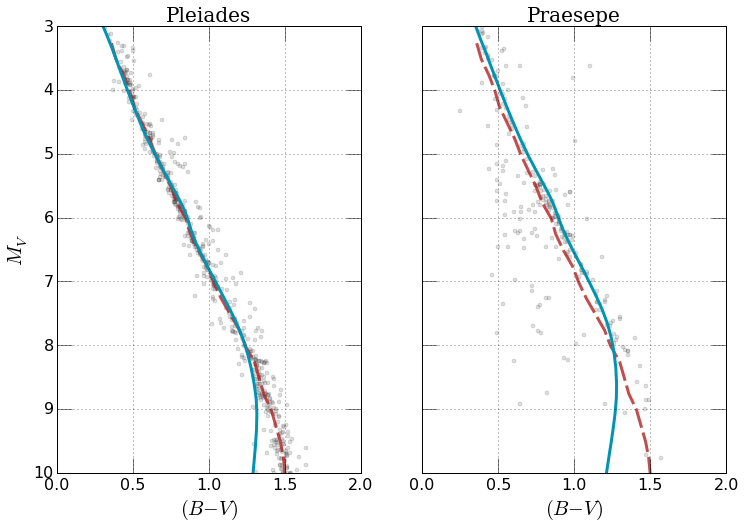

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12., 8.), sharex=True, sharey=True)

for axis in ax:
    axis.grid(True)
    axis.tick_params(which='major', axis='both', length=15., labelsize=16.)
    axis.set_ylim(10., 3.)
    axis.set_xlim(0.0, 2.0)
    axis.set_xlabel('$(B-V)$', fontsize=20.)

# PLEIADES
ax[0].set_title('Pleiades', fontsize=20., family='serif')
ax[0].set_ylabel('$M_V$', fontsize=20.)
ax[0].plot(pleiades_k14[:, 2] - pl_ebv, pleiades_k14[:, 0] - pl_av - pl_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[0].plot(pleiades_s07[:, 6] - pleiades_s07[:, 7] - pl_ebv, pleiades_s07[:, 7] - pl_av - pl_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[0].plot(iso_emp_k14[:, 1] - pl_ebv, iso_emp_k14[:, 0] - pl_av - pl_dis, 
               dashes=(20., 5.), lw=3, c='#B22222', alpha=0.8)
ax[0].plot(iso_120_gas07[:, 7] - iso_120_gas07[:, 8], iso_120_gas07[:, 8], lw=3, c='#0094b2')

# PRAESEPE
ax[1].set_title('Praesepe', fontsize=20., family='serif')
ax[1].plot(praesepe_u79[:, 1] - pr_ebv, praesepe_u79[:, 0] - pr_av - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(praesepe_w81[:, 1] - pr_ebv, praesepe_w81[:, 0] - pr_av - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(praesepe_s82[:, 1] - pr_ebv, praesepe_s82[:, 0] - pr_av - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(praesepe_m90[:, 1] - pr_ebv, praesepe_m90[:, 0] - pr_av - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(praesepe_j11[:, 1] - pr_ebv, praesepe_j11[:, 0] - pr_av - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(iso_emp_k14[:, 1] - pl_ebv, iso_emp_k14[:, 0] - pl_av - pl_dis, 
               dashes=(20., 5.), lw=3, c='#B22222', alpha=0.8)
ax[1].plot(iso_600_gas07[:, 7] - iso_600_gas07[:, 8], iso_600_gas07[:, 8], lw=3, c='#0094b2')

Already we see a hint that Pleiades stars are as blue as one might expect (on average) given the properties of the cluster. Similarly, the stars in Praesepe are just as red as expected. However, issues arise once one begins to directly compare K-dwarf stars in the two clusters. The empirical isochrone from Kamai et al. (2014) reproduces well the Pleiades locus and is barely visible under the model isochrone, lending credence to the quality of the model color predictions above $M_V \sim 8$. However, if we compare the Kamai empirical isochrone to stars in Praesepe, the Kamai isochrone is noticeably bluer between $6 < M_V < 8$, or the magnitude range covered largely by K-dwarf stars. Yet, in both cases the model isochrones reproduce the morpohology of the CMDs, differing only by their ages (insignificant) and their metallicity. 

Since this analysis is relatively sensitive to reddening and distance modulii, we should demonstrate how CMDs look in other passbands and also, perhaps, in color-color diagrams.

In [6]:
praesepe_a02 = np.genfromtxt('data/Adams_Praesepe.txt', usecols=(3, 4, 5, 6, 7, 8))  # 2MASS NIR photometry
praesepe_h99 = np.genfromtxt('data/Hodgkin_Praesepe.txt') # JHK (UKIRT?) photometry
praesepe_t08 = np.genfromtxt('data/Taylor_Praesepe.txt')  # VRI (Cousins) photometry

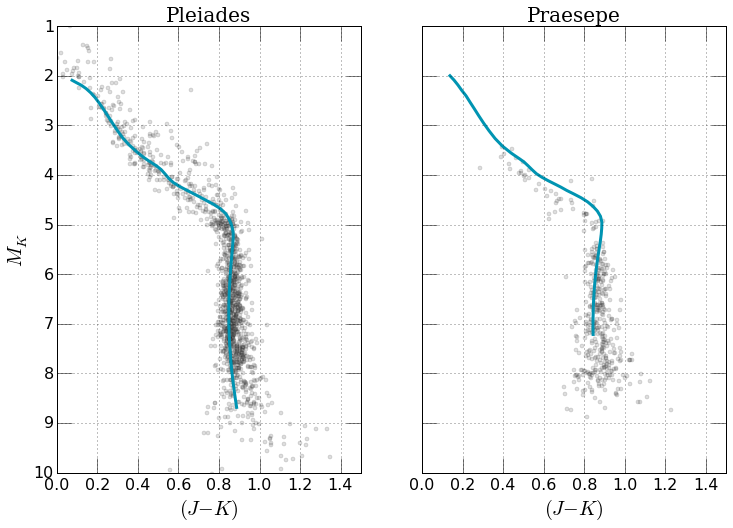

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12., 8.), sharex=True, sharey=True)

for axis in ax:
    axis.grid(True)
    axis.tick_params(which='major', axis='both', length=15., labelsize=16.)
    axis.set_ylim(10., 1.)
    axis.set_xlim(0.0, 1.5)
    axis.set_xlabel('$(J - K)$', fontsize=20.)

# PLEIADES
ax[0].set_title('Pleiades', fontsize=20., family='serif')
ax[0].set_ylabel('$M_K$', fontsize=20.)
ax[0].plot(pleiades_s07[:, 0] - pleiades_s07[:, 4] - pl_ejk, pleiades_s07[:, 4] - pl_ak - pl_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[0].plot(iso_120_gas07[:, 11] - iso_120_gas07[:, 13], iso_120_gas07[:, 13], lw=3, c='#0094b2')

# PRAESEPE
ax[1].set_title('Praesepe', fontsize=20., family='serif')
ax[1].plot(praesepe_a02[:, 0] - praesepe_a02[:, 4] - pr_ejk, praesepe_a02[:, 4] - pr_ak - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(praesepe_h99[:, 7] - pr_ejk, praesepe_h99[:, 4] - pr_ak - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(iso_600_gas07[:, 11] - iso_600_gas07[:, 13], iso_600_gas07[:, 13], lw=3, c='#0094b2')

Unfortunately, for Praesepe, there is not enough NIR data G and K dwarfs beyond the MgH bump. We can see from the Pleiades cluster that there are some issues with the observed K band magnitudes in the small region between the MgH bump and the formation of strong water absorption.

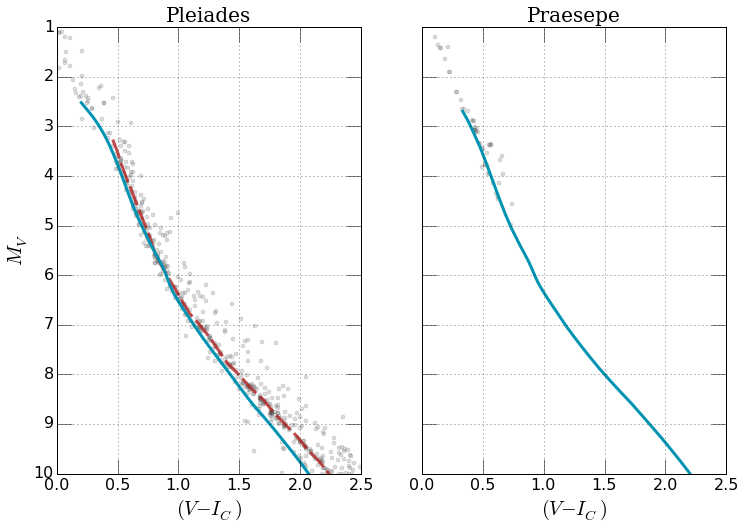

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12., 8.), sharex=True, sharey=True)

for axis in ax:
    axis.grid(True)
    axis.tick_params(which='major', axis='both', length=15., labelsize=16.)
    axis.set_ylim(10., 1.)
    axis.set_xlim(0.0, 2.5)
    axis.set_xlabel('$(V - I_C)$', fontsize=20.)

# PLEIADES
ax[0].set_title('Pleiades', fontsize=20., family='serif')
ax[0].set_ylabel('$M_V$', fontsize=20.)
ax[0].plot(pleiades_s07[:, 7] - pleiades_s07[:, 8] - pl_evi, pleiades_s07[:, 7] - pl_av - pl_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[0].plot(pleiades_k14[:, 4] - pl_evi, pleiades_k14[:, 0] - pl_av - pl_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[0].plot(iso_emp_k14[:, 2] - pl_ebv, iso_emp_k14[:, 0] - pl_av - pl_dis, 
               dashes=(20., 5.), lw=3, c='#B22222', alpha=0.8)
ax[0].plot(iso_120_gas07[:, 8] - iso_120_gas07[:, 10], iso_120_gas07[:, 8], lw=3, c='#0094b2')

# PRAESEPE
ax[1].set_title('Praesepe', fontsize=20., family='serif')
ax[1].plot(praesepe_t08[:, 5] + praesepe_t08[:, 7] - pr_evi, praesepe_t08[:, 3] - pr_av - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(praesepe_j11[:, -1] - pr_evi, praesepe_j11[:, 0] - pr_av - pr_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[1].plot(iso_600_gas07[:, 8] - iso_600_gas07[:, 10], iso_600_gas07[:, 8], lw=3, c='#0094b2')

Now for a (V - K) diagram for the Pleiades only.

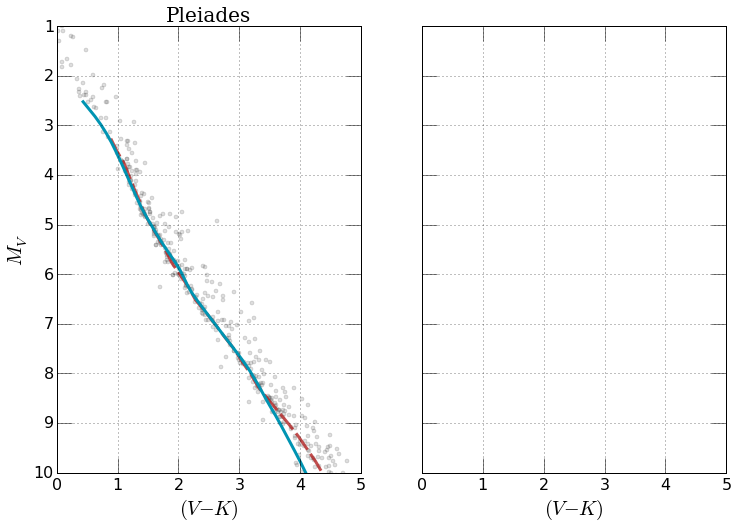

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12., 8.), sharex=True, sharey=True)

for axis in ax:
    axis.grid(True)
    axis.tick_params(which='major', axis='both', length=15., labelsize=16.)
    axis.set_ylim(10., 1.)
    axis.set_xlim(0.0, 5.0)
    axis.set_xlabel('$(V - K)$', fontsize=20.)

# PLEIADES
ax[0].set_title('Pleiades', fontsize=20., family='serif')
ax[0].set_ylabel('$M_V$', fontsize=20.)
ax[0].plot(pleiades_s07[:, 7] - pleiades_s07[:, 4] - pl_evk, pleiades_s07[:, 7] - pl_av - pl_dis, 
            'o', c='#555555', markersize=4.0, alpha=0.2)
ax[0].plot(iso_emp_k14[:, 3] - pl_evk, iso_emp_k14[:, 0] - pl_av - pl_dis, 
               dashes=(20., 5.), lw=3, c='#B22222', alpha=0.8)
ax[0].plot(iso_120_gas07[:, 8] - iso_120_gas07[:, 13], iso_120_gas07[:, 8], lw=3, c='#0094b2')